# Gradient Boosting

Este notebook entrena un modelo Gradient Boosting para predecir la temperatura usando variables climáticas históricas.

1. Comienza con un modelo muy simple (como predecir el promedio).
2. Calcula los errores (residuos) entre las predicciones y los valores reales.
3. Entrena un nuevo árbol para predecir esos errores.
4. Actualiza el modelo sumando lo aprendido (con un pequeño peso).
5. Repite el proceso muchas veces (iterativamente).

Cada nuevo árbol corrige lo que el anterior no logró predecir bien.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
# Cargar y preparar los datos
df = pd.read_csv("Historia_Climatica.csv")

# Eliminar columnas no útiles o temporales
X = df.drop(columns=["Fecha_Hora", "Temperatura_C"])
y = df["Temperatura_C"]

# Convertir variables categóricas
X = pd.get_dummies(X, drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

In [6]:
# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [8]:
# Evaluación del modelo
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 22903.712283474255
R²: -0.12759963068734081


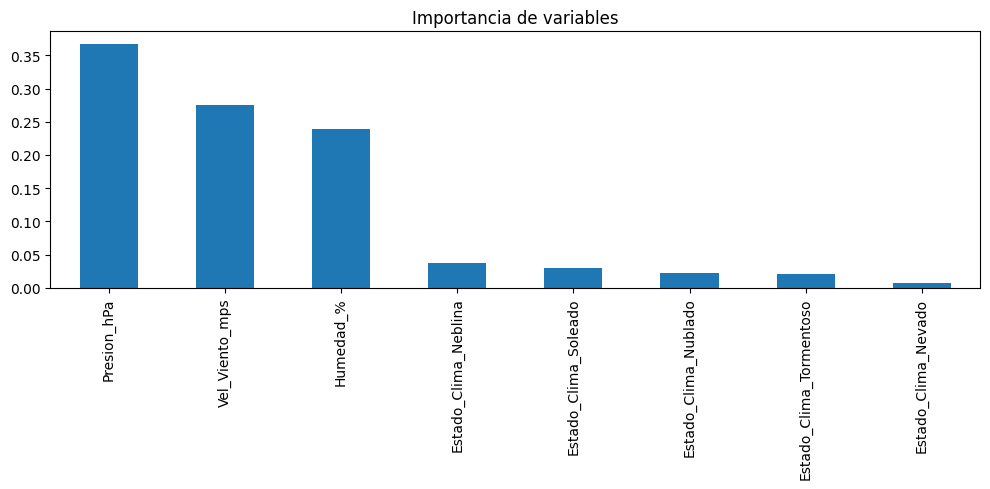

In [9]:
# Importancia de las variables
importancia = pd.Series(modelo.feature_importances_, index=X.columns)
importancia.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Importancia de variables")
plt.tight_layout()
plt.show()


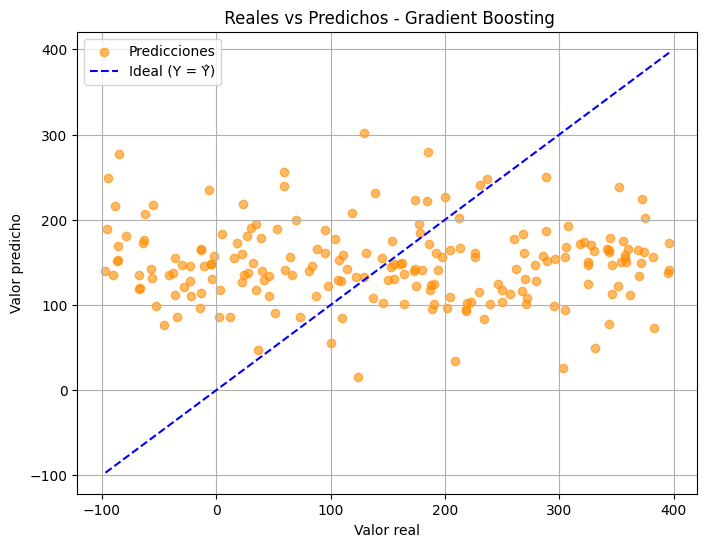

In [11]:
# Visualización: valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='darkorange', alpha=0.6, label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', label="Ideal (Y = Ŷ)")
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.title(" Reales vs Predichos - Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()
